In [2]:
from io_su2.file_read_util import *
from cfd_helper_functions.discretization_error import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import scipy.io
from vandv_tools.util import *


[[0.00955205 0.00906631 0.01130283]
 [0.00321975 0.00528224 0.00561207]]
[[0.01940791 0.00972378 0.00486667]]
0.2615400032
[[0.01694222 0.10722091 0.14374581]
 [0.01133561 0.11646233 0.10514716]]
[[0.01940791 0.00972378 0.00486667]]
0.5312989028
[[0.002334   0.00203672 0.00170647]
 [0.00215106 0.00275919 0.00303168]]
[[0.01940791 0.00972378 0.00486667]]
0.01903592109
[[0.00156101 0.         0.00258795]
 [0.00288634 0.00537972 0.00490842]]
[[0.01940791 0.00972378 0.00486667]]
0.05553694518


<Figure size 1000x1000 with 0 Axes>

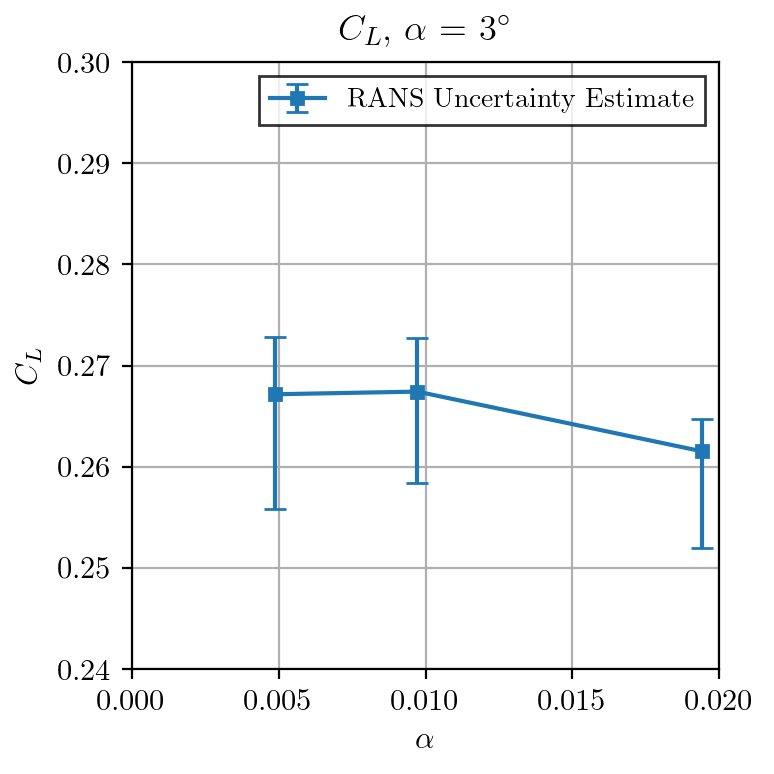

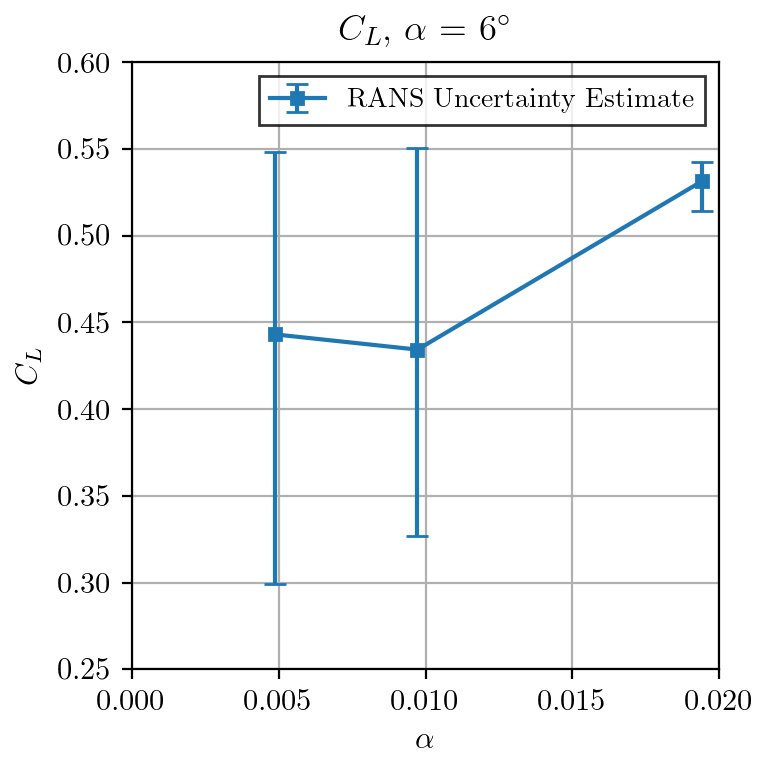

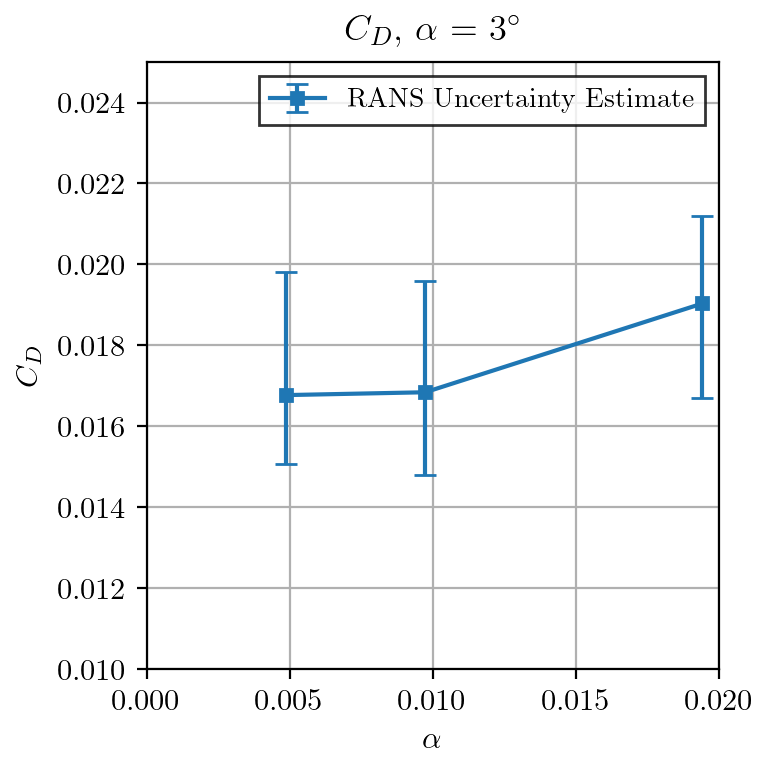

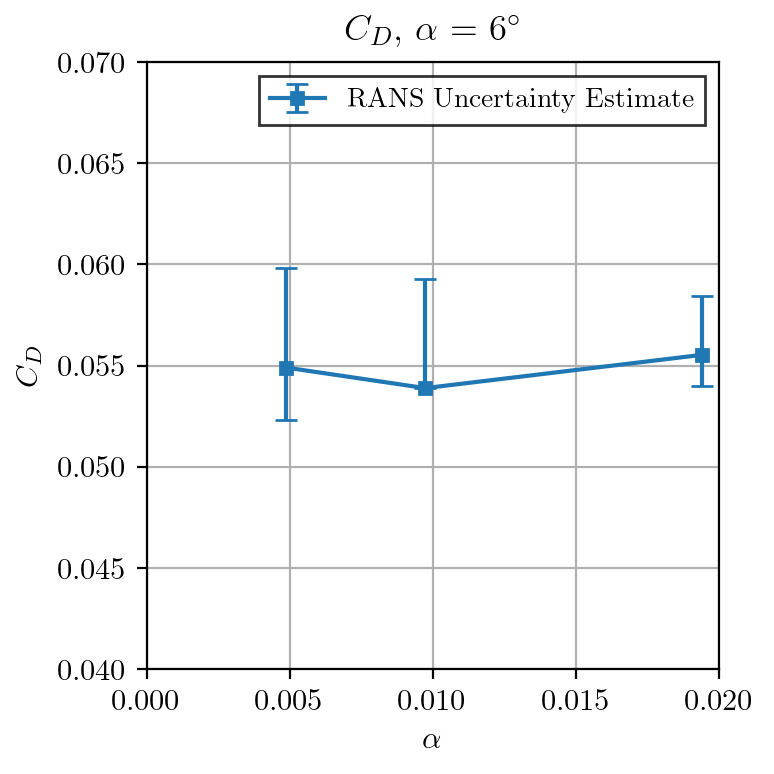

In [8]:
titles = {'CL':r'$C_L$','CD':r'$C_D$','CMy':r'$C_m$ vs. $\alpha$'}
labels = {'naart':'NAART ','lst_nasa':'12 Ft LST NASA', 'usm3d_sst':'USM3D, SST','usm3d_sa':'USM3D, SA','Coarse':'SU2, SST Coarse', 'Medium_Coarse':'SU2, SST Medium-Coarse','Medium':'SU2, SST Medium','Fine':'SU2, SST Fine'}
ylabels = {'CL':r'$C_L$','CD':r'$C_D$','CMy':r'$C_m$'}
shade_fill = {"." : "black","least_squares" : "red"}
coeffs = ["CL","CD"]
folders= ["03aoa", "06aoa"]
aoa_vals = np.array([float(i.split('aoa')[0]) for i in folders])

meshes= ["L4","L3","L2"]
ylims = {'CL': {'03aoa' : (0.24,0.30), '06aoa' : (0.25,0.6)},
         'CD': {'03aoa' : (0.01,0.025), '06aoa' : (0.04,0.07)}}
plt.style.use('article')
plt.rcParams['font.family']='serif'
matplotlib.rc('text',usetex=True)
grads = ["."]



plt.figure(figsize=(5,5))
for coeff in coeffs:
    for aoa,aoa_folder in enumerate(folders):
        fn = 'data/oneram6_{}_{}_tmr_uq.csv'.format(aoa_folder,coeff)
        with open(fn) as f:
            header = f.readline()
        header = [h.strip() for h in header.split(',')]
        dtype=[]
        for var in header:
            dtype.append((var,np.float64))
        data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
            
        plt.figure(figsize = (4,4))
        yplus_err = np.reshape(data['max'] - data['baseline'],(1,3))
        ymin_err = np.reshape(data['baseline'] - data['min'],(1,3))
        y_err = np.append(ymin_err,yplus_err,axis = 0)
        print(y_err)
        print(np.reshape(data['h'],(1,3)))
        print(data['baseline'][0])
        plt.errorbar(data['h'],data['baseline'], yerr = y_err, marker='s',label="RANS Uncertainty Estimate")
        plt.xlabel(r'$\alpha$')
        plt.ylabel(ylabels[coeff])
        plt.title(titles[coeff] + r', $\alpha$ = ' + aoa_folder.strip('0aoa') + r'$^\circ$')
        plt.xlim((0,0.02))
        plt.ylim(ylims[coeff][aoa_folder])
        plt.tight_layout()
        plt.grid()
        plt.legend(frameon=True,framealpha=0.8,edgecolor='0.0',fancybox=False,fontsize=10)
        plt.savefig('images/'+coeff+'_'+aoa_folder+'.png')